# 1. Import library

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu, kruskal
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import joblib
from scipy.stats import skew

# 2. Load and screen preliminary information

In [580]:
origin_df = pd.read_csv('..\\Datasets\\NY-House-Dataset.csv')
origin_df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [581]:
origin_df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [582]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [583]:
print(f'Number of missing values: {origin_df.isna().sum().sum()}')

Number of missing values: 0


In [584]:
origin_df.shape

(4801, 17)

In [585]:
origin_df.columns = origin_df.columns.str.lower()

In [586]:
origin_df.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# 3. Splitting dataset into training set and test set

In [587]:
X = origin_df.drop('price', axis=1)
y = origin_df['price']

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [589]:
df_original_train = pd.concat([X_train, y_train], axis=1)
df_original_test = pd.concat([X_test, y_test], axis=1)

In [590]:
print(f'Shape of training set: {df_original_train.shape}\nShape of test set: {df_original_test.shape}')

Shape of training set: (3840, 17)
Shape of test set: (961, 17)


In [591]:
df_original_train.to_csv('..\\Datasets\\original_training_set.csv', index=False)
df_original_test.to_csv('..\\Datasets\\original_test_set.csv', index=False)

# 4. Preprocessing and Data Analysis

## 4.1 Univariate and Bivariate Analysis

In [592]:
def univariate_analysis(df, column):
    uni_dict = {}
    if (pd.api.types.is_numeric_dtype(df[column])):
        uni_dict['mean'] = df[column].mean()
        uni_dict['std'] = df[column].std()
        uni_dict['median'] = df[column].median()
        uni_dict['min'] = df[column].min()
        uni_dict['max'] = df[column].max()
        uni_dict['25%'] = df[column].quantile(0.25)
        uni_dict['75%'] = df[column].quantile(0.75)
        uni_dict['kurtosis'] = df[column].kurt()
        uni_dict['skewness'] = df[column].skew()
        uni_dict['type'] = df[column].dtypes
        uni_dict['nan'] = df[column].isna().sum()
        return pd.DataFrame(uni_dict, index=[0])

    else:
        uni_dict['num_unique'] = df[column].nunique()
        uni_dict['num_value'] = df[column].count()
        uni_dict['mode'] = df[column].mode()
        uni_dict['type'] = df[column].dtypes
        uni_dict['null'] = df[column].isnull().sum()
        return pd.DataFrame(uni_dict, index=[0])

     


In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_distribution(series, threshold = 0.8, plot = True, normalize = True):
    freq = series.value_counts(normalize = normalize)
    cum_freq = freq.cumsum()
    
    summary_df = pd.DataFrame({
        'count' if normalize else 'percent': freq,
        'cumulative': cum_freq
    })

    lorenz_y = np.insert(np.cumsum(np.sort(freq.values)), 0, 0)
    lorenz_y = lorenz_y / lorenz_y[-1]
    lorenz_x = np.linspace(0, 1, len(lorenz_y))
    gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)

    if plot:
        plt.figure(figsize=(6,6))
        plt.plot(lorenz_x, lorenz_y, label='Lorenz Curve')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Line of Equality')
        plt.title('Lorenz Curve')
        plt.xlabel('Cumulative Share of Categories')
        plt.ylabel('Cumulative Share of Frequency')
        plt.grid(True)
        plt.legend()
        plt.text(0.05, 0.8, f'Gini Coefficient: {gini:.4f}', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        plt.show()
    
    top_categories = summary_df[summary_df['cumulative'] <= threshold].index.tolist()

    return {
        'summary_df': summary_df,
        'top_categories': top_categories,
        'gini_coefficient': gini
    }


In [594]:
df_train = pd.read_csv('..\\Datasets\\original_training_set.csv')
df_test = pd.read_csv('..\\Datasets\\original_test_set.csv')

## Price column (target variable)

In [595]:
univariate_analysis(df_train,'price')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,2.460047e+06,3.496998e+07,838000.0,2494,2147483647,499000.0,1499999.0,3690.484424,60.198555,int64,0


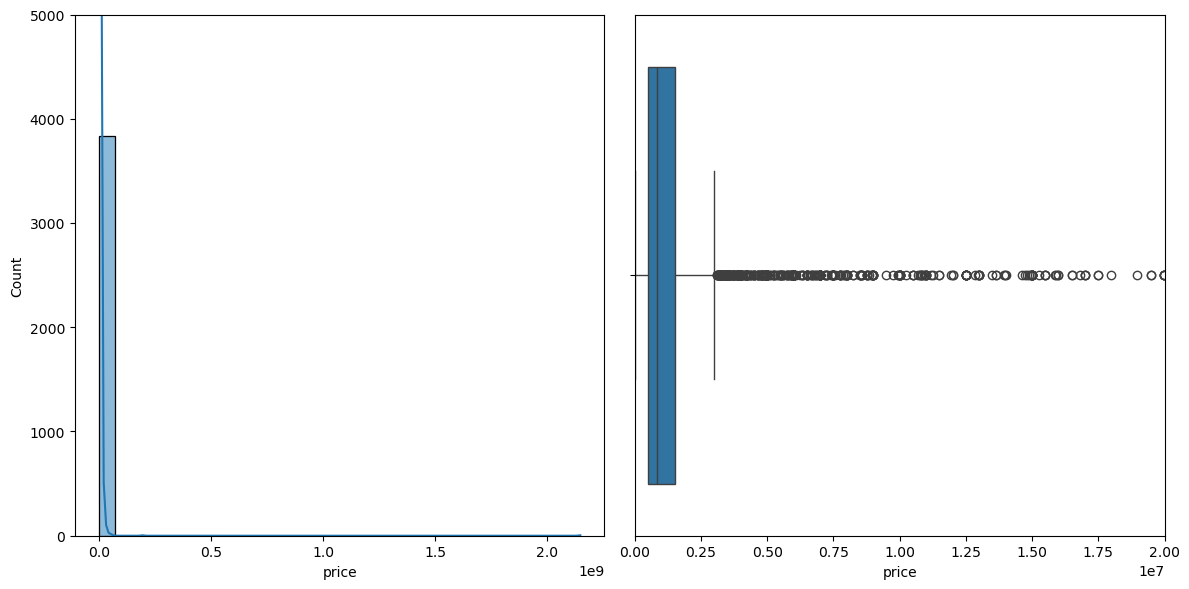

In [596]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.histplot(df_train['price'], bins=30, kde=True, ax=ax[0])
ax[0].set_ylim(0, 5000)
sns.boxplot(x=df_train['price'], ax=ax[1])  
ax[1].set_xlim(0, 20000000)

plt.tight_layout()
plt.show()

## brokertitle column (Title of the broker)

In [597]:
univariate_analysis(df_train,'brokertitle')

,num_unique,num_value,mode,type,null
0,914,3840,Brokered by COMPASS,object,0


C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


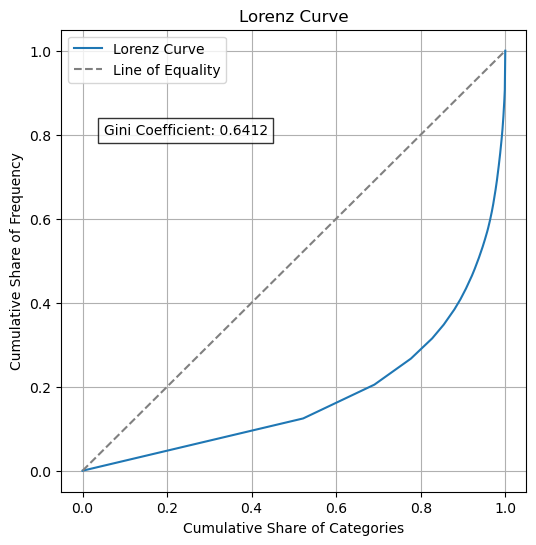

{'summary_df':                                                        count  cumulative
 brokertitle                                                             
 Brokered by COMPASS                                 0.093229    0.093229
 Brokered by Douglas Elliman - 575 Madison Ave       0.023958    0.117188
 Brokered by Brown Harris Stevens                    0.019531    0.136719
 Brokered by Corcoran East Side                      0.019271    0.155990
 Brokered by RE MAX Edge                             0.016667    0.172656
 ...                                                      ...         ...
 Brokered by Nestapple                               0.000260    0.998958
 Brokered by Best American Homes Inc                 0.000260    0.999219
 Brokered by F.G. VOLPE REALTY "SERVICING STATEN...  0.000260    0.999479
 Brokered by Joe Hasselt Real Estate                 0.000260    0.999740
 Brokered by Prime Time Real Estate, Inc.            0.000260    1.000000
 
 [914 rows x 2 columns

In [598]:
brokertitle_analysis = analyze_categorical_distribution(df_train['brokertitle'], threshold=0.35, plot=True, normalize=True)
brokertitle_analysis 

In [599]:
len(brokertitle_analysis['top_categories'])

23

In [600]:
df_train['brokertitle'] = df_train['brokertitle'].where(df_train['brokertitle'].isin(brokertitle_analysis['top_categories']), 'other')
df_test['brokertitle'] = df_test['brokertitle'].where(df_test['brokertitle'].isin(brokertitle_analysis['top_categories']), 'other')

In [601]:
univariate_analysis(df_train,'brokertitle')

,num_unique,num_value,mode,type,null
0,24,3840,other,object,0


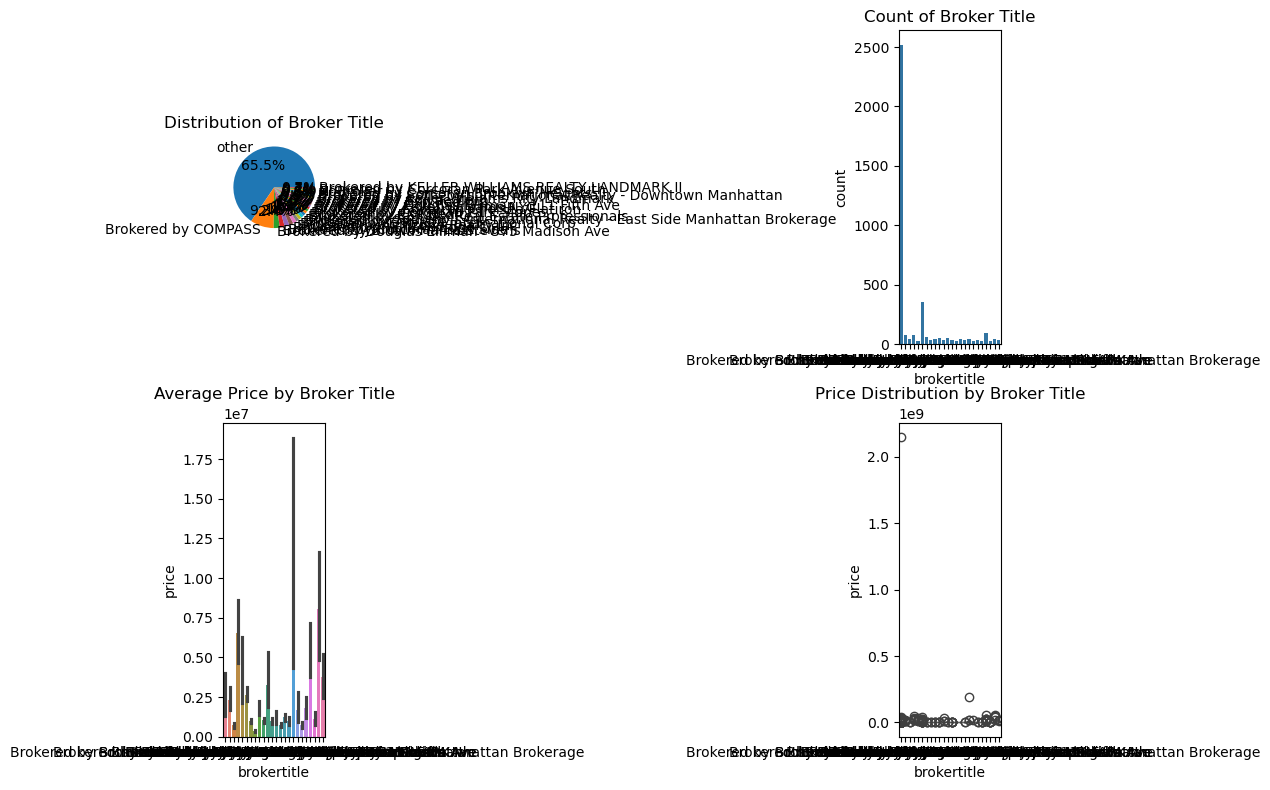

In [602]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

ax[0][0].pie(df_train['brokertitle'].value_counts(), labels=df_train['brokertitle'].value_counts().index, autopct='%1.1f%%')
ax[0][0].set_title('Distribution of Broker Title')

sns.countplot(data=df_train, x='brokertitle', ax=ax[0][1])
ax[0][1].set_title('Count of Broker Title')

sns.barplot(data=df_train, x='brokertitle', y='price', ax=ax[1][0], hue='brokertitle')
ax[1][0].set_title('Average Price by Broker Title')

sns.boxplot(data=df_train, x='brokertitle', y='price', ax=ax[1][1], hue='brokertitle')
ax[1][1].set_title('Price Distribution by Broker Title')

plt.tight_layout()
plt.show()

In [603]:
groups = df_train.groupby('brokertitle')['price'].apply(list)

stat, p_value = kruskal(*groups)

pd.DataFrame({
    'stat': stat,
    'p_value': p_value,
    'reject_null': p_value < 0.05
}, index=[0])

,stat,p_value,reject_null
0,479.892453,5.341894e-87,True


## type column (Type of the house) (deal with the category, some classes are too small)

In [604]:
univariate_analysis(origin_df,'type')

,num_unique,num_value,mode,type,null
0,13,4801,Co-op for sale,object,0


In [605]:
pd.Series(origin_df['type'].unique())

0                 Condo for sale
1                 House for sale
2             Townhouse for sale
3                 Co-op for sale
4     Multi-family home for sale
5                       For sale
6                     Contingent
7                  Land for sale
8                    Foreclosure
9                        Pending
10                   Coming Soon
11         Mobile house for sale
12               Condop for sale
dtype: object

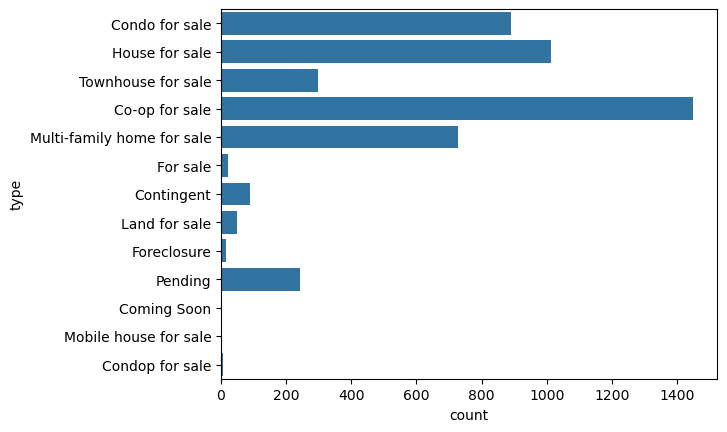

In [606]:
sns.countplot(origin_df['type'])

plt.show()

#### condop for sale might be condo for sale so we will reassign them as condo for sale

In [607]:
df_train['type'] = df_train['type'].replace({'Condop for sale': 'Condo for sale'})
df_test['type'] = df_test['type'].replace({'Condop for sale': 'Condo for sale'})

#### Treat For sale as a null value so we will deal with this by adding mode of this features to these null values

In [608]:
df_train['type'] = df_train['type'].replace({'For sale': 'Co-op for sale'})
df_test['type'] = df_test['type'].replace({'For sale': 'Co-op for sale'})

#### there are 4 values that are not about the type of a property (Pending, Contingent, Foreclosure, Coming soon). Since these values describe the status of a property so we create a status column 

In [609]:
status_value = ['Pending', 'Contingent', 'Foreclosure', 'Coming soon']
df_train['status'] = df_train['type'].where(df_train['type'].isin(status_value))
df_test['status'] = df_test['type'].where(df_test['type'].isin(status_value))

In [610]:
# treat these values in type as null values and then fill in with mode
df_train['type'] = df_train['type'].replace({'Pending': 'Co-op for sale', 'Contingent': 'Co-op for sale', 'Foreclosure': 'Co-op for sale', 'Coming soon': 'Co-op for sale', 'Coming Soon': 'Co-op for sale'})
df_test['type'] = df_test['type'].replace({'Pending': 'Co-op for sale', 'Contingent': 'Co-op for sale', 'Foreclosure': 'Co-op for sale', 'Coming soon': 'Co-op for sale', 'Coming Soon': 'Co-op for sale'})

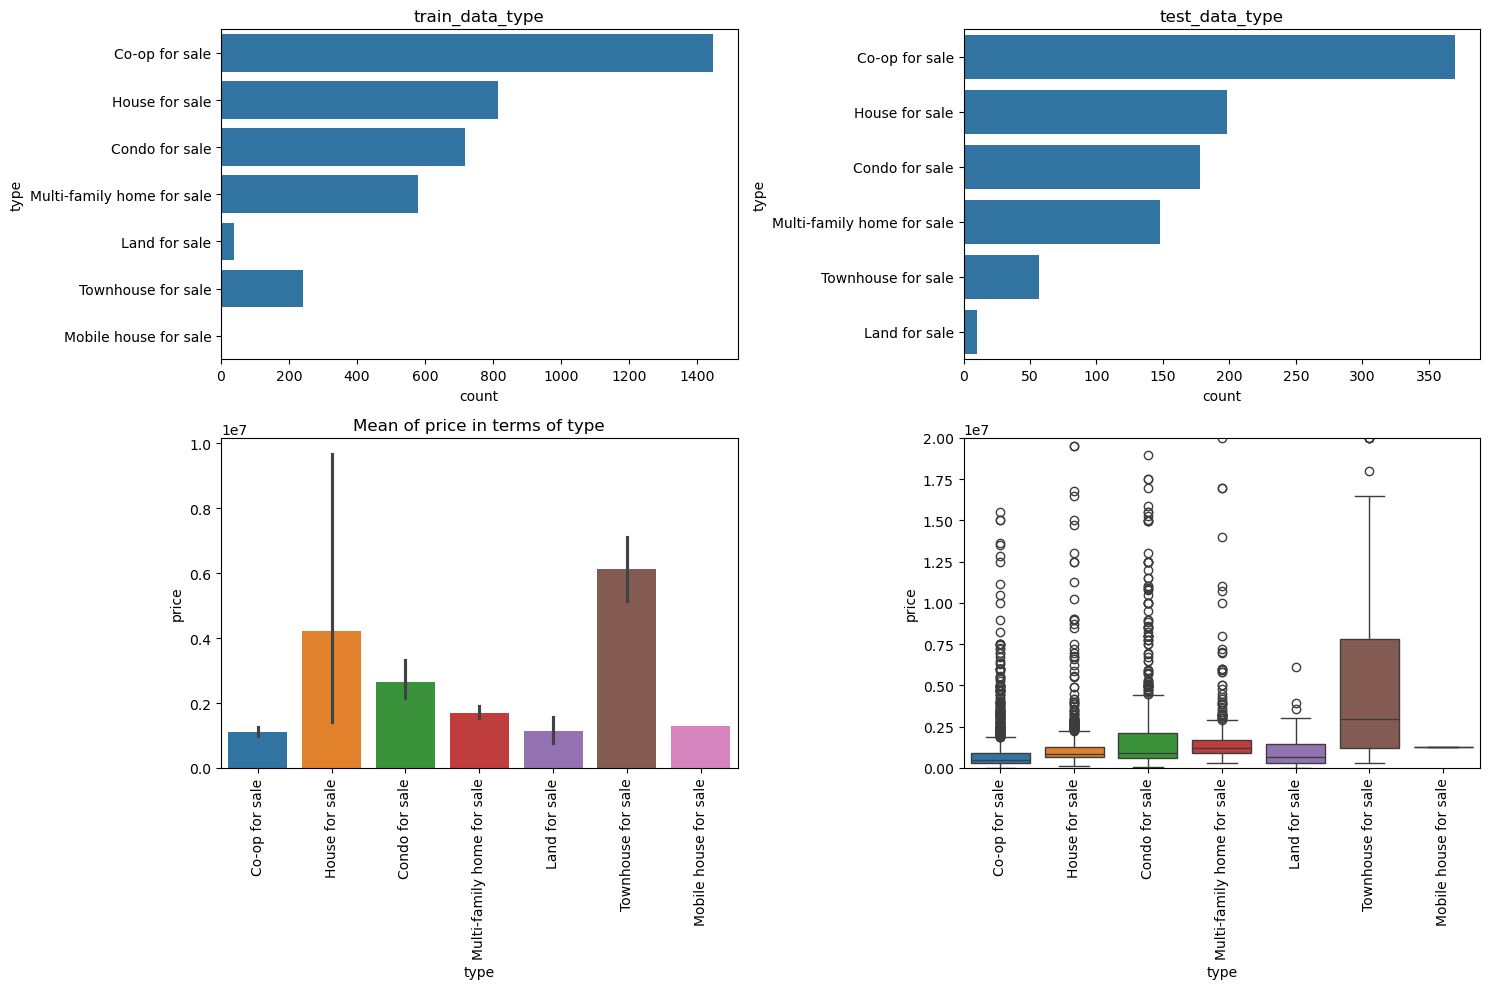

In [611]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(df_test['type'], ax=ax[0][1])
ax[0][1].set_title("test_data_type")
sns.countplot(df_train['type'], ax=ax[0][0])
ax[0][0].set_title("train_data_type")
sns.barplot(data=df_train, x='type', y='price',hue='type', ax=ax[1][0])
ax[1][0].set_title("Mean of price in terms of type")
ax[1][0].tick_params(axis='x', labelrotation=90)

sns.boxplot(data=df_train, x='type', y='price', hue='type',ax=ax[1][1])
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_ylim(0,20000000)

plt.tight_layout()
plt.show()

In [612]:
df_train = df_train[df_train['type'].map(df_train['type'].value_counts()) > 1]

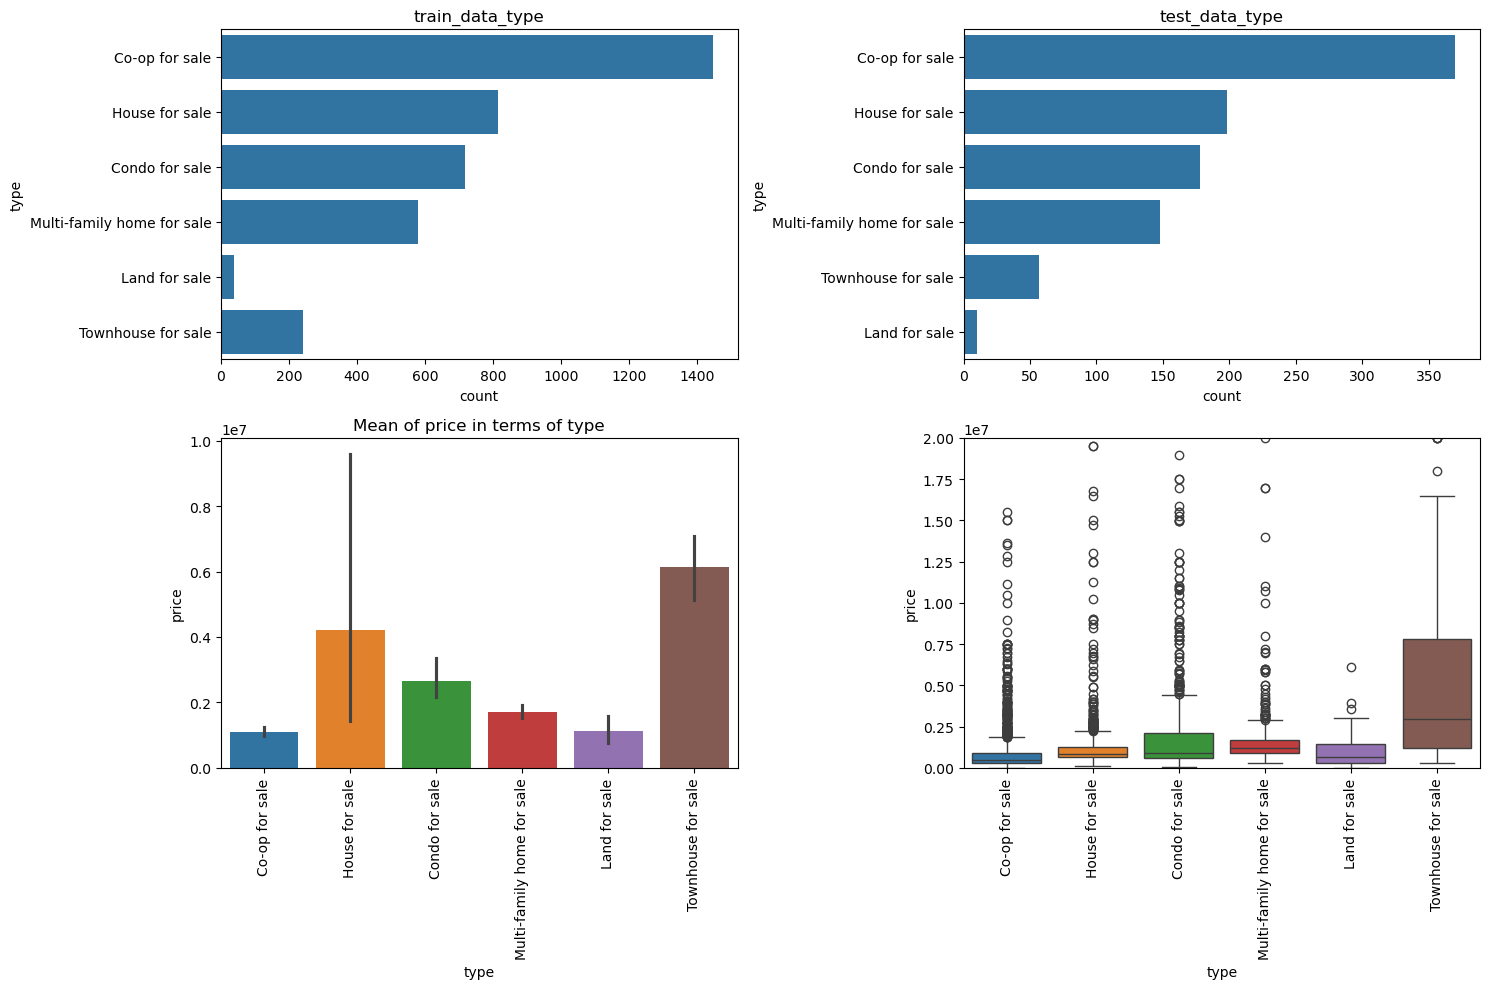

In [613]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(df_test['type'], ax=ax[0][1])
ax[0][1].set_title("test_data_type")
sns.countplot(df_train['type'], ax=ax[0][0])
ax[0][0].set_title("train_data_type")
sns.barplot(data=df_train, x='type', y='price',hue='type', ax=ax[1][0])
ax[1][0].set_title("Mean of price in terms of type")
ax[1][0].tick_params(axis='x', labelrotation=90)

sns.boxplot(data=df_train, x='type', y='price', hue='type',ax=ax[1][1])
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_ylim(0,20000000)

plt.tight_layout()
plt.show()

In [614]:
groups = [df_train[df_train['type'] == label]['price'] for label in df_train['type'].unique()]

stats, p_value = kruskal(*groups)

pd.DataFrame({'stats': stats, 'p_value': p_value, 'p_value < 0.05': p_value < 0.05}, index=[0])

,stats,p_value,p_value < 0.05
0,814.455815,8.627514e-174,True


### status column

In [615]:
univariate_analysis(df_train,'status')

,num_unique,num_value,mode,type,null
0,3,284,Pending,object,3555


In [616]:
# fill nan value with mode of status feature
df_train['status'] = df_train['status'].fillna('Pending')
df_test['status'] = df_test['status'].fillna('Pending')

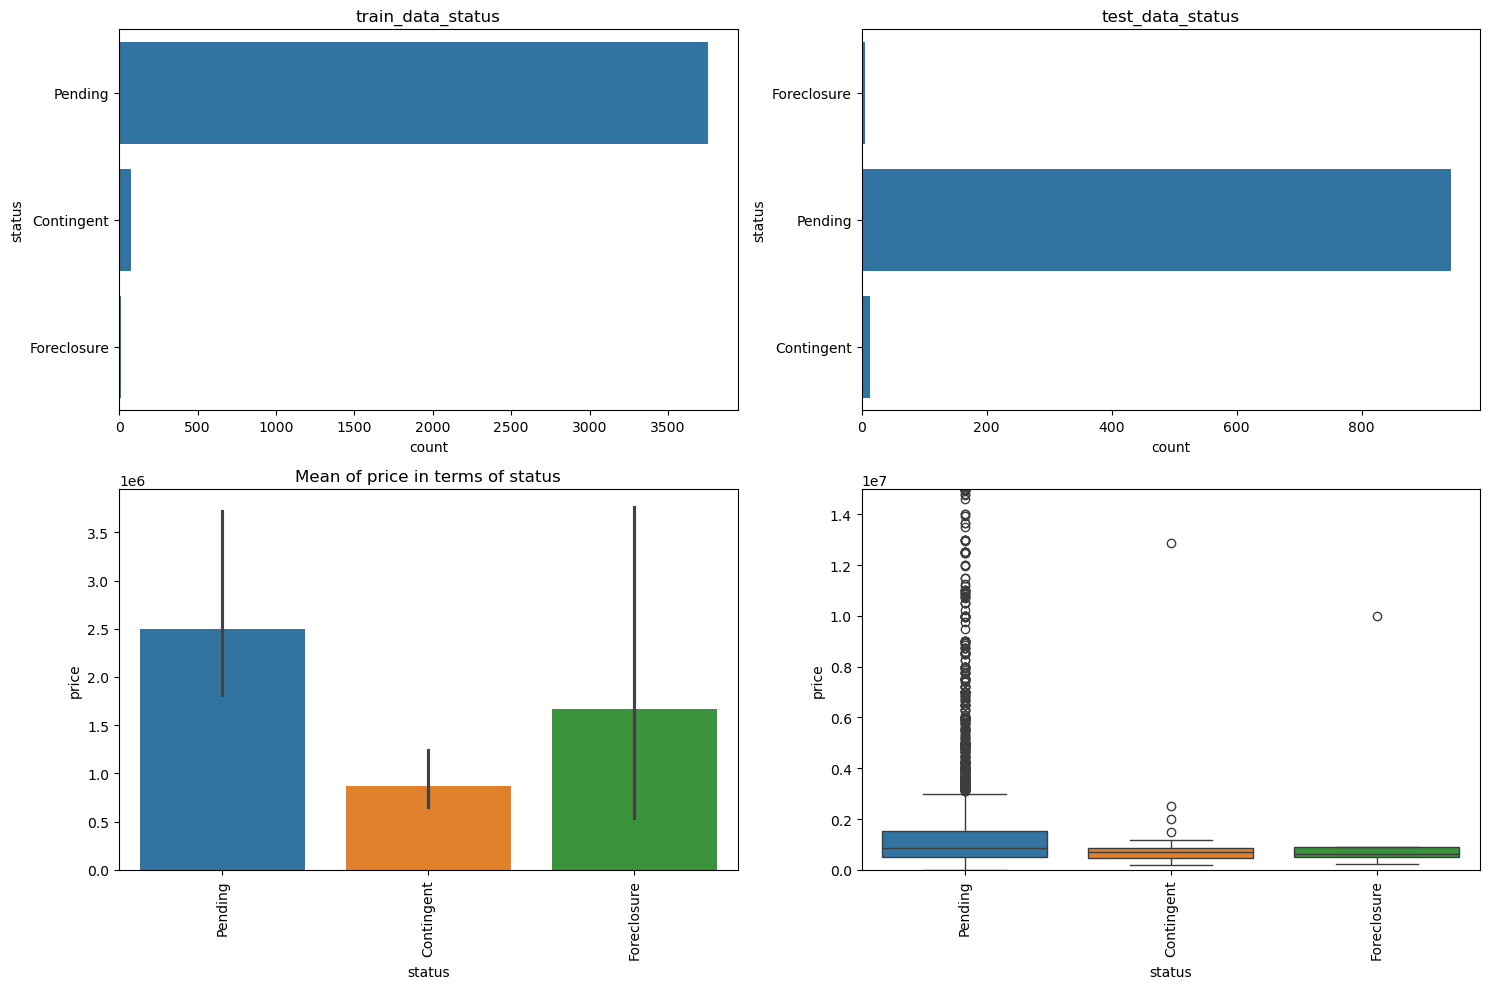

In [617]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.countplot(df_test['status'], ax=ax[0][1])
ax[0][1].set_title("test_data_status")
sns.countplot(df_train['status'], ax=ax[0][0])
ax[0][0].set_title("train_data_status")
sns.barplot(data=df_train, x='status', y='price',hue='status', ax=ax[1][0])
ax[1][0].set_title("Mean of price in terms of status")
ax[1][0].tick_params(axis='x', labelrotation=90)

sns.boxplot(data=df_train, x='status', y='price', hue='status',ax=ax[1][1])
ax[1][1].tick_params(axis='x', labelrotation=90)
ax[1][1].set_ylim(0,15000000)

plt.tight_layout()
plt.show()

In [618]:
groups = [df_train[df_train['status'] == label]['price'] for label in df_train['status'].unique()]

stats, p_value = kruskal(*groups)

pd.DataFrame({'stats': stats, 'p_value': p_value, 'p_value < 0.05': p_value < 0.05}, index=[0])

,stats,p_value,p_value < 0.05
0,12.019038,0.002455,True


## beds column (Number of bedrooms)

In [619]:
univariate_analysis(df_train,'beds')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,3.352696,2.599578,3.0,1,50,2.0,4.0,64.986559,5.521973,int64,0


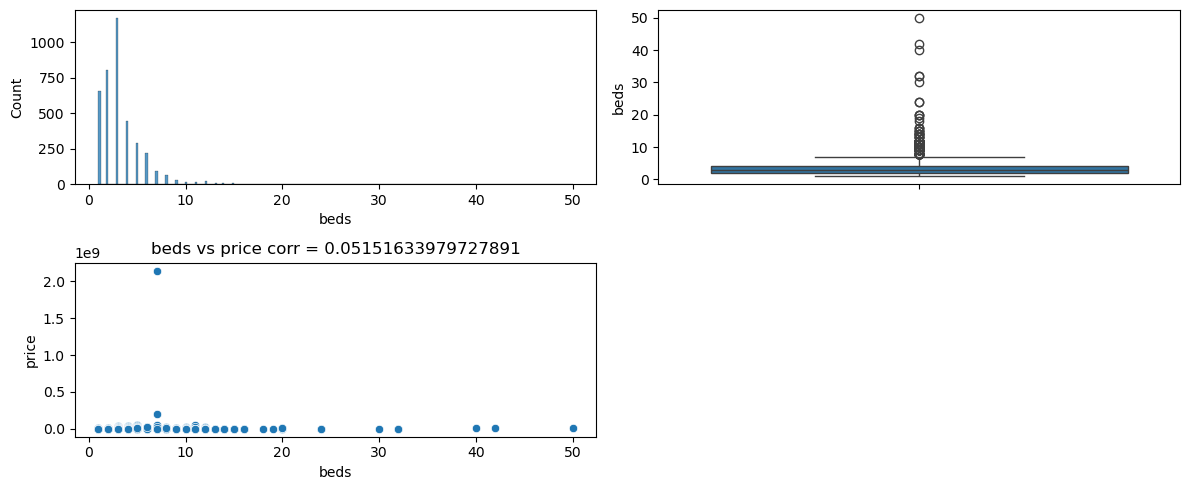

In [620]:
figure, ax = plt.subplots(2,2, figsize = (12,5))

sns.histplot(df_train['beds'],ax = ax[0][0])
sns.boxplot(df_train['beds'], ax = ax[0][1])

sns.scatterplot(data=df_train, x='beds', y='price', ax=ax[1][0])
ax[1][0].set_title(f"beds vs price corr = {np.corrcoef(df_train['beds'], df_train['price'])[0][1]}")

ax[1][1].axis('off')

plt.tight_layout()
plt.show()

## bath column (Number of bathrooms) (mistyping problem)

In [621]:
univariate_analysis(df_train, 'bath')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,2.383915,2.003848,2.0,0.0,50.0,1.0,3.0,149.526809,8.444994,float64,0


In [622]:
# number of bathrooms can't be in float data type -> error
bath_arr = origin_df['bath']
is_integer = bath_arr == np.floor(bath_arr)

print("Number of Integer:", len(bath_arr[is_integer]))
print("Number of Float:", len(bath_arr[~is_integer]))

Number of Integer: 4499
Number of Float: 302


#### May be the values that are in floating point number are filled with mean value so we will round these value and reassign the data type of this feature to int64

In [623]:
df_train['bath'] = np.round(df_train['bath']).astype('int64')
df_test['bath'] = np.round(df_test['bath']).astype('int64')

In [624]:
univariate_analysis(df_train, 'bath')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,2.36025,2.006034,2.0,0,50,1.0,3.0,149.261567,8.452383,int64,0


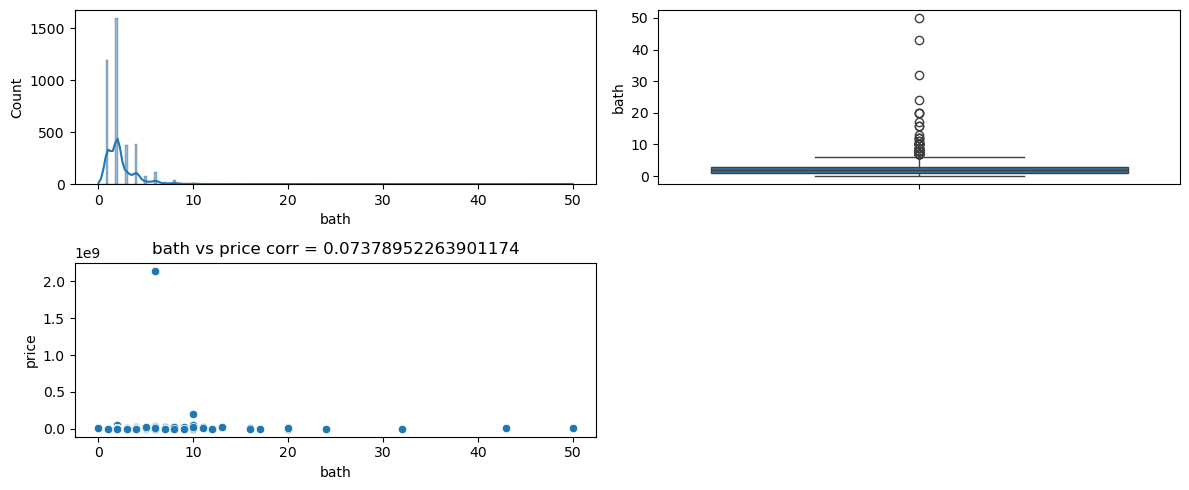

In [625]:
figure, ax = plt.subplots(2,2,figsize = (12,5))

sns.histplot(df_train['bath'], kde=True, ax=ax[0][0])
sns.boxplot(df_train['bath'], ax = ax[0][1])

sns.scatterplot(data=df_train, x='bath', y='price', ax=ax[1][0])
ax[1][0].set_title(f"bath vs price corr = {np.corrcoef(df_train['bath'], df_train['price'])[0][1]}")

ax[1][1].axis("off")

plt.tight_layout()
plt.show()

## propertysqft column (Square footage of the property)

In [626]:
univariate_analysis(df_train, 'propertysqft')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,2188.690483,2466.840788,2184.207862,246.0,65535.0,1200.0,2184.207862,270.971579,13.431416,float64,0


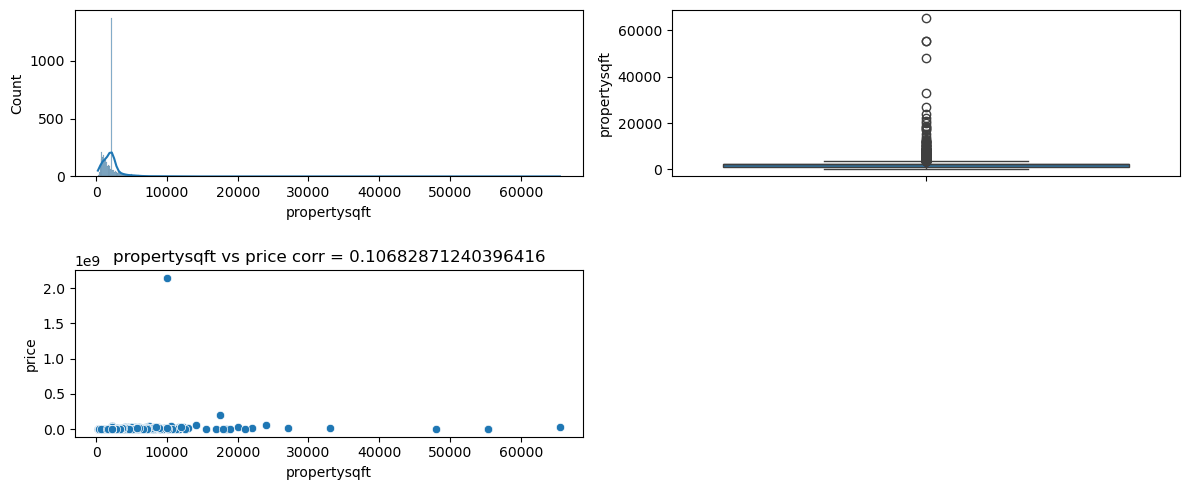

In [627]:
figure, ax = plt.subplots(2,2,figsize = (12,5))

sns.histplot(df_train['propertysqft'], kde=True, ax=ax[0][0])
sns.boxplot(df_train['propertysqft'], ax = ax[0][1])

sns.scatterplot(data=df_train, x='propertysqft', y='price', ax=ax[1][0])
ax[1][0].set_title(f"propertysqft vs price corr = {np.corrcoef(df_train['propertysqft'], df_train['price'])[0][1]}")

ax[1][1].axis("off")

plt.tight_layout()
plt.show()

## address column (Full address of the house) (might be dropped)

In [628]:
univariate_analysis(df_train, 'address')

,num_unique,num_value,mode,type,null
0,3700,3839,103-12 104th St,object,0


In [629]:
df_train['address'].value_counts()

address
519 Tulfan Ter               2
781 Sheperd Ave              2
40 W 67th St Apt 8B          2
146-06 13th Ave              2
103-12 104th St              2
                            ..
123 E 80th St                1
445 Waverly Ave              1
157 E 72nd St Apt 8I         1
86C Edgewater Park Unit C    1
9437 Shore Rd Unit 1A        1
Name: count, Length: 3700, dtype: int64

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


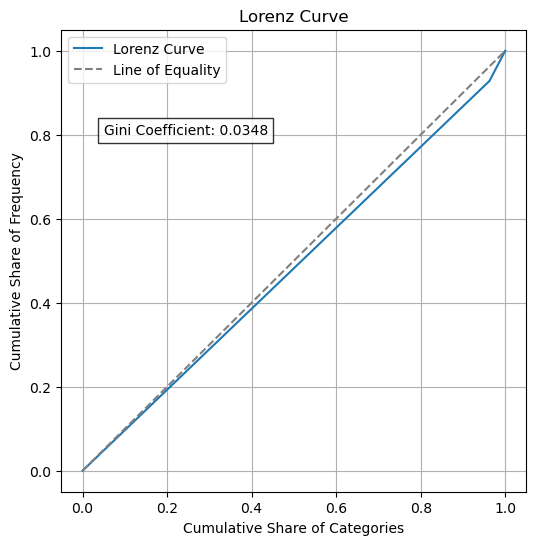

In [630]:
address_analysis = analyze_categorical_distribution(df_train['address'], threshold=0.8, plot=True, normalize=True)

In [631]:
# each home has a unique address, so we can drop this feature
df_train = df_train.drop('address', axis=1)
df_test = df_test.drop('address', axis=1)

## state column (State of the house) (categorize again)

In [632]:
univariate_analysis(df_train,'state')

,num_unique,num_value,mode,type,null
0,294,3839,"Brooklyn, NY 11235",object,0


In [633]:
origin_df['state'].value_counts()

state
Brooklyn, NY 11235            102
Brooklyn, NY 11209             94
Forest Hills, NY 11375         91
Brooklyn, NY 11234             90
Staten Island, NY 10314        86
                             ... 
Ditmas Park, NY 11226           1
Flushing, NY 11365              1
New York, NY 10282              1
Long Island City, NY 11106      1
Ozone Park, NY 11416            1
Name: count, Length: 308, dtype: int64

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


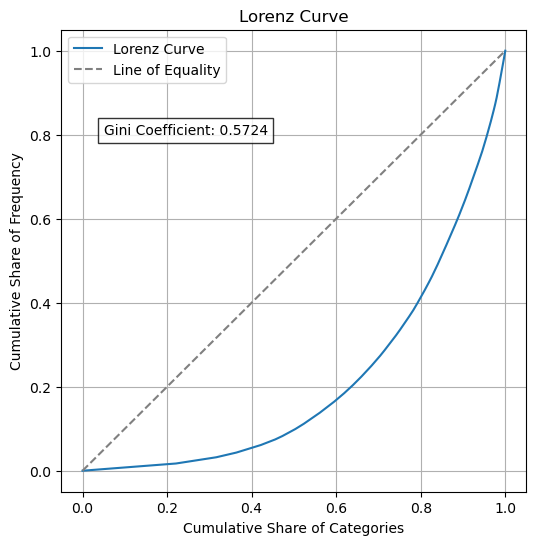

In [634]:
state_analysis = analyze_categorical_distribution(df_train['state'], threshold=0.7, plot=True, normalize=True)


In [635]:
len(state_analysis['top_categories'])

80

##### As I can see that the values follow this format "< borough >, NY < zip code >", so I will create new features named borough and zip code

In [636]:
df_train['borough'] = df_train['state'].str.split(",").str[0]

df_test['borough'] = df_test['state'].str.split(",").str[0]

In [637]:
# As far as I'm concerned, New York is the other name of Mahattan so I will modify New York to Mahattan
# Bronx Ny belongs to Bronx
# Rego Park belongs to Queens
# Kew Garden Hills belongs to Queens
# Manhattan
# - Roosevelt Island
# - Stuyvesant Heights
# - Ditmas Park

# Brooklyn
# - Brooklyn Heights
# - Crown Heights
# - Bedford Stuyvesant
# - Canarsie
# - Brighton Beach
# - Kensington
# - East Flatbush
# - Stuyvesant Heights
# - Ditmas Park
# - Prospect Lefferts Gardens
# - Old Mill Basin
# - Brownville

# Queens
# - Jackson Heights
# - Elmhurst
# - Woodside
# - Rego Park
# - Forest Hills
# - Briarwood
# - Flushing
# - Woodhaven
# - Jamaica
# - Richmond Hill South
# - Whitestone
# - Ridgewood
# - Rosedale
# - Ozone Park
# - Springfield Gardens
# - Far Rockaway
# - Bellerose
# - Bayside
# - Astoria
# - Floral Park
# - Fresh Meadows
# - Howard Beach
# - Cambria Heights
# - Rockaway Park
# - East Elmhurst
# - Little Neck
# - Long Island City
# - Corona
# - Kew Gardens
# - Maspeth
# - Queens Village
# - Richmond Hill
# - Middle Village
# - Saint Albans
# - South Ozone Park
# - College Point
# - Hollis
# - Malba
# - Glen Oaks
# - Douglaston
# - Sunnyside
# - Arverne
# - Glendale
# - New Hyde Park
# - Beechhurst
# - Kew Gardens Hills

# Bronx
# - Bronx Ny
# - Bronx County

# Staten Island
# - Belle Harbor
df_train['borough'] = df_train['borough'].replace({'New York:': 'Manhattan', 
                                       'Nyc': 'Manhattan', 'Ny': 
                                       'Manhattan', 
                                       'Bronx Ny': 'Bronx', 
                                       'Kew Garden Hills': 'Queens',
                                       'Roosevelt Island': 'Manhattan',
                                       'Stuyvesant Heights': 'Manhattan',
                                       'Ditmas Park': 'Brooklyn',
                                       'Brooklyn Heights': 'Brooklyn',
                                       'Crown Heights': 'Brooklyn',
                                       'Bedford Stuyvesant': 'Brooklyn',
                                       'Canarsie': 'Brooklyn',
                                       'Brighton Beach': 'Brooklyn',
                                       'Kensington': 'Brooklyn',
                                       'East Flatbush': 'Brooklyn',
                                       'Prospect Lefferts Gardens': 'Brooklyn',
                                       'Old Mill Basin': 'Brooklyn',
                                       'Brownville': 'Brooklyn',
                                       'Jackson Heights': 'Queens',
                                       'Elmhurst': 'Queens',
                                       'Woodside': 'Queens',
                                       'Rego Park': 'Queens',
                                       'Forest Hills': 'Queens',
                                       'Briarwood': 'Queens',
                                       'Flushing': 'Queens',
                                       'Woodhaven': 'Queens',
                                       'Jamaica': 'Queens',
                                       'Richmond Hill South': 'Queens',
                                       'Whitestone': 'Queens',
                                       'Ridgewood': 'Queens',
                                       'Rosedale': 'Queens',
                                       'Ozone Park': 'Queens',
                                       'Springfield Gardens': 'Queens',
                                       'Far Rockaway': 'Queens',
                                       'Bellerose': 'Queens',
                                       'Bayside': 'Queens',
                                       'Astoria': 'Queens',
                                       'Floral Park': 'Queens',
                                       'Fresh Meadows': 'Queens',
                                       'Howard Beach': 'Queens',
                                       'Cambria Heights': 'Queens',
                                       'Rockaway Park': 'Queens',
                                       'East Elmhurst': 'Queens',
                                       'Little Neck': 'Queens',
                                       'Long Island City': 'Queens',
                                       'Corona': 'Queens',
                                       'Kew Gardens': 'Queens',
                                       'Maspeth': 'Queens',
                                       'Queens Village': 'Queens',
                                       'Richmond Hill': 'Queens',
                                       'Middle Village': 'Queens',
                                       'Saint Albans': 'Queens',
                                       'South Ozone Park': 'Queens',
                                       'College Point': 'Queens',
                                       'Hollis': 'Queens',
                                       'Malba': 'Queens',
                                       'Glen Oaks': 'Queens',
                                       'Douglaston': 'Queens',
                                       'Sunnyside': 'Queens',
                                       'Arverne': 'Queens',
                                       'Glendale': 'Queens',
                                       'New Hyde Park': 'Queens',
                                       'Beechhurst': 'Queens',
                                       'Kew Gardens Hills': 'Queens',
                                       'Bronx County': 'Bronx',
                                       'Belle Harbor': 'Staten Island',
                                       'New York City': 'Manhattan',
                                       'New York': 'Manhattan'})

df_test['borough'] = df_test['borough'].replace({'New York:': 'Manhattan', 
                                       'Nyc': 'Manhattan', 'Ny': 
                                       'Manhattan', 
                                       'Bronx Ny': 'Bronx', 
                                       'Kew Garden Hills': 'Queens',
                                       'Roosevelt Island': 'Manhattan',
                                       'Stuyvesant Heights': 'Manhattan',
                                       'Ditmas Park': 'Brooklyn',
                                       'Brooklyn Heights': 'Brooklyn',
                                       'Crown Heights': 'Brooklyn',
                                       'Bedford Stuyvesant': 'Brooklyn',
                                       'Canarsie': 'Brooklyn',
                                       'Brighton Beach': 'Brooklyn',
                                       'Kensington': 'Brooklyn',
                                       'East Flatbush': 'Brooklyn',
                                       'Prospect Lefferts Gardens': 'Brooklyn',
                                       'Old Mill Basin': 'Brooklyn',
                                       'Brownville': 'Brooklyn',
                                       'Jackson Heights': 'Queens',
                                       'Elmhurst': 'Queens',
                                       'Woodside': 'Queens',
                                       'Rego Park': 'Queens',
                                       'Forest Hills': 'Queens',
                                       'Briarwood': 'Queens',
                                       'Flushing': 'Queens',
                                       'Woodhaven': 'Queens',
                                       'Jamaica': 'Queens',
                                       'Richmond Hill South': 'Queens',
                                       'Whitestone': 'Queens',
                                       'Ridgewood': 'Queens',
                                       'Rosedale': 'Queens',
                                       'Ozone Park': 'Queens',
                                       'Springfield Gardens': 'Queens',
                                       'Far Rockaway': 'Queens',
                                       'Bellerose': 'Queens',
                                       'Bayside': 'Queens',
                                       'Astoria': 'Queens',
                                       'Floral Park': 'Queens',
                                       'Fresh Meadows': 'Queens',
                                       'Howard Beach': 'Queens',
                                       'Cambria Heights': 'Queens',
                                       'Rockaway Park': 'Queens',
                                       'East Elmhurst': 'Queens',
                                       'Little Neck': 'Queens',
                                       'Long Island City': 'Queens',
                                       'Corona': 'Queens',
                                       'Kew Gardens': 'Queens',
                                       'Maspeth': 'Queens',
                                       'Queens Village': 'Queens',
                                       'Richmond Hill': 'Queens',
                                       'Middle Village': 'Queens',
                                       'Saint Albans': 'Queens',
                                       'South Ozone Park': 'Queens',
                                       'College Point': 'Queens',
                                       'Hollis': 'Queens',
                                       'Malba': 'Queens',
                                       'Glen Oaks': 'Queens',
                                       'Douglaston': 'Queens',
                                       'Sunnyside': 'Queens',
                                       'Arverne': 'Queens',
                                       'Glendale': 'Queens',
                                       'New Hyde Park': 'Queens',
                                       'Beechhurst': 'Queens',
                                       'Kew Gardens Hills': 'Queens',
                                       'Bronx County': 'Bronx',
                                       'Belle Harbor': 'Staten Island',
                                       'New York City': 'Manhattan',
                                       'New York': 'Manhattan'})

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\248694206.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


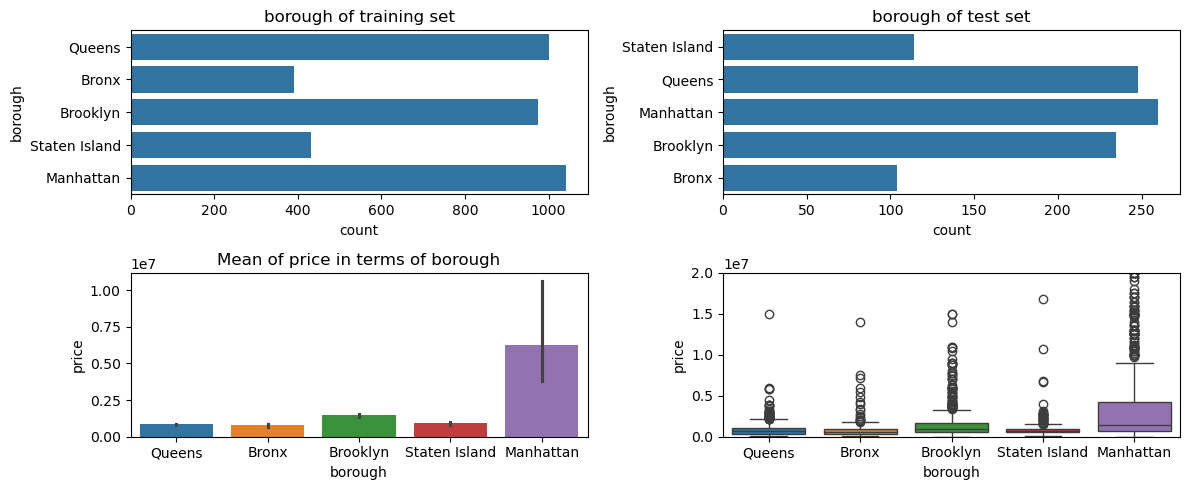

In [638]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(2,2,figsize=(12,5))

sns.countplot(df_test['borough'], ax=ax[0][1])
ax[0][1].set_title("borough of test set")
sns.countplot(df_train['borough'], ax=ax[0][0])
ax[0][0].set_title("borough of training set")

sns.barplot(data=df_train, x='borough', y='price', hue='borough',ax=ax[1][0])
ax[1][0].set_title("Mean of price in terms of borough")

sns.boxplot(data=df_train, x='borough', y='price',hue='borough', ax=ax[1][1])
ax[1][1].set_ylim(0, 20000000)
plt.tight_layout()
plt.show()

In [639]:
# drop state 
df_train = df_train.drop(['state'], axis = 1)
df_test = df_test.drop(['state'], axis = 1)

### main address column

In [640]:
univariate_analysis(df_train, 'main_address')

,num_unique,num_value,mode,type,null
0,3701,3839,"103-12 104th StOzone Park, NY 11417",object,0


In [641]:
# drop because the number of unique value is appoximate the number of data point which will lead to a circumstance where the model doesn't learn any pattern
df_train= df_train.drop(['main_address'], axis=1)
df_test= df_test.drop(['main_address'], axis=1)

### administrative_area_level_2 column

In [642]:
df_train['administrative_area_level_2'].unique()

array(['United States', 'New York', 'New York County', 'Queens County',
       '10301', '10310', 'Bronx County', '11237', '10465', 'Brooklyn',
       '10003', '10463', 'Kings County', '10471', '11214', '10002',
       '10312', '11229', '10304', '10017', '11417', '10306', '10309',
       '11218', '10466', '10303'], dtype=object)

In [643]:
univariate_analysis(df_train,'administrative_area_level_2')

,num_unique,num_value,mode,type,null
0,26,3839,United States,object,0


C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


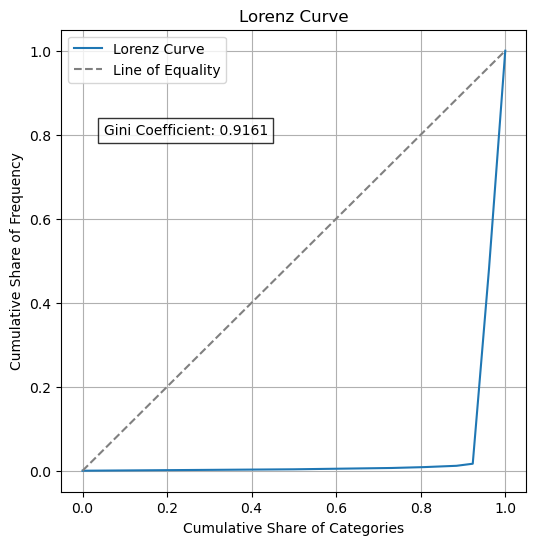

25

In [644]:
import seaborn as sns
import matplotlib.pyplot as plt

administrative_area_level_2_analysis = analyze_categorical_distribution(df_train['administrative_area_level_2'], threshold=1, plot=True, normalize=True)
len(administrative_area_level_2_analysis['top_categories'])

In [645]:
groups = [df_train[df_train['administrative_area_level_2'] == label]['price'] for label in df_train['administrative_area_level_2'].unique()]

stats, p_value = kruskal(*groups)

pd.DataFrame({'stats': stats, 'p_value': p_value, 'p_value<0.05': p_value<0.05}, index=[0])

,stats,p_value,p_value<0.05
0,412.242139,9.632581e-72,True


### locality column 

In [646]:
univariate_analysis(df_train, 'locality')

,num_unique,num_value,mode,type,null
0,11,3839,New York,object,0


In [647]:
df_train['locality'].value_counts()

locality
New York           2012
New York County     785
Queens County       440
Kings County        366
Bronx County        141
Richmond County      50
United States        30
Queens                6
The Bronx             4
Brooklyn              4
Flatbush              1
Name: count, dtype: int64

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


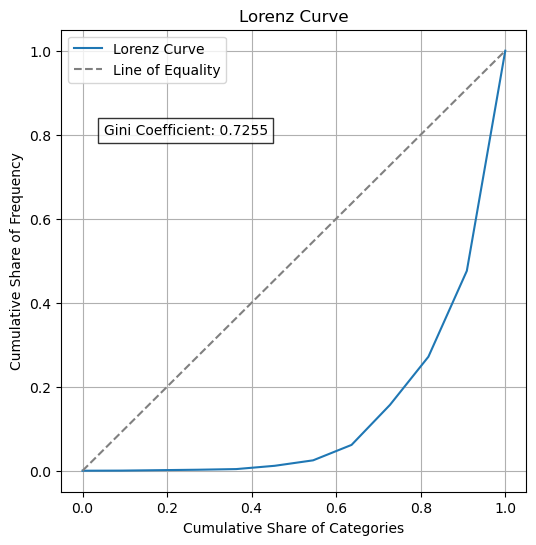

0

In [648]:
locality_analysis = analyze_categorical_distribution(df_train['locality'], threshold=0.1, plot=True, normalize=True)
len(locality_analysis['top_categories'])

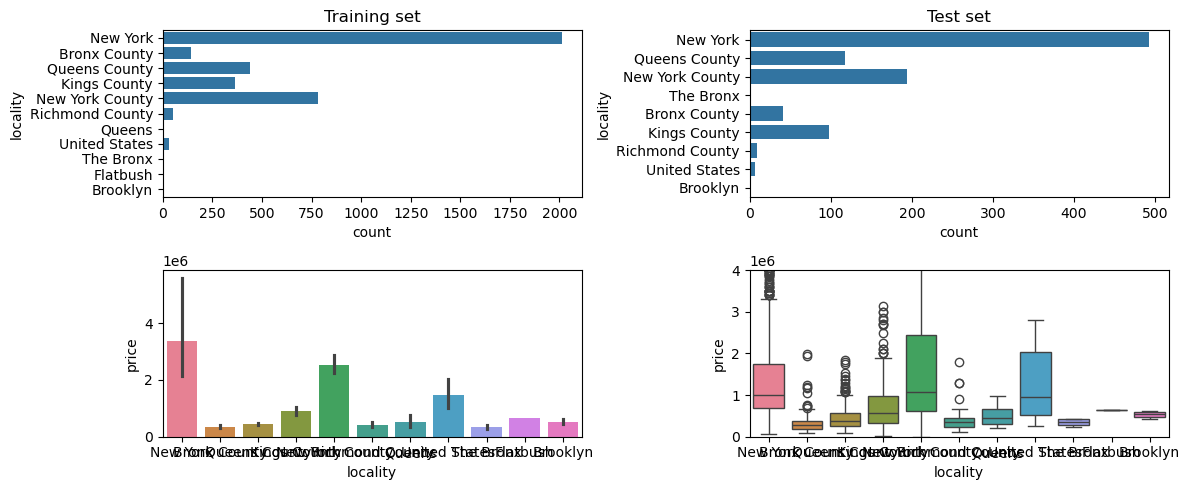

In [649]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,2, figsize = (12,5))

sns.countplot(df_train['locality'], ax=ax[0][0])
ax[0][0].set_title("Training set")
sns.countplot(df_test['locality'], ax=ax[0][1])
ax[0][1].set_title("Test set")
sns.barplot(data=df_train, x='locality', y='price', ax=ax[1][0], hue='locality')
sns.boxplot(data=df_train, x='locality', y='price', ax=ax[1][1], hue='locality')
ax[1][1].set_ylim(0,4000000)

plt.tight_layout()
plt.show()

In [650]:
# drop because there is a class imbalance problem
df_train = df_train.drop(['locality'], axis=1)
df_test = df_test.drop(['locality'], axis=1)

### sublocality column 

In [651]:
univariate_analysis(df_train, 'sublocality')

,num_unique,num_value,mode,type,null
0,18,3839,New York,object,0


In [652]:
df_train['sublocality'].value_counts()

sublocality
New York           815
Kings County       594
Queens County      553
Queens             439
Richmond County    376
Brooklyn           366
Bronx County       244
New York County    226
The Bronx          142
Staten Island       50
Manhattan           19
Flushing             4
Riverdale            4
Coney Island         3
Rego Park            1
Snyder Avenue        1
Jackson Heights      1
Fort Hamilton        1
Name: count, dtype: int64

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


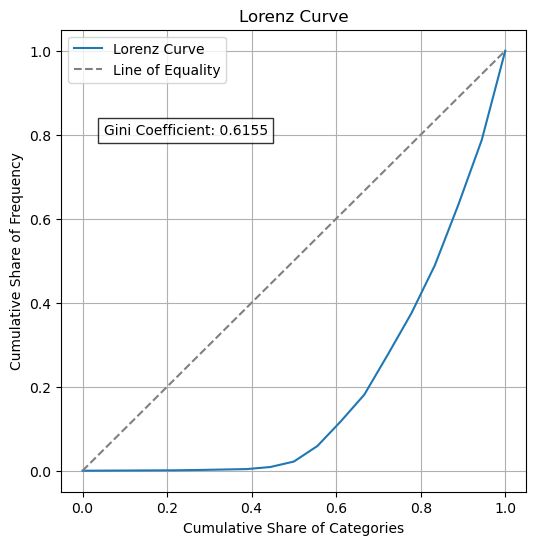

5

In [653]:
sublocality_analysis = analyze_categorical_distribution(df_train['sublocality'], threshold=0.8, plot=True, normalize=True)
len(sublocality_analysis['top_categories'])

In [654]:
# drop because it is the same as borough column
df_train = df_train.drop(['sublocality'], axis=1)
df_test = df_test.drop(['sublocality'], axis=1)

### long name column

In [655]:
univariate_analysis(df_train, 'long_name')

,num_unique,num_value,mode,type,null
0,2359,3839,2,object,0


In [656]:
df_train['long_name'].unique()

array(['62nd Avenue', '5601', '17-85', ..., 'Nansen Street', '99-72',
       'Fairfax Avenue'], shape=(2359,), dtype=object)

In [657]:
# drop since the number of unique value is more than 50% of the number of datapoint and there are a lot of uninterpreted values
df_train = df_train.drop(['long_name'], axis=1)
df_test = df_test.drop(['long_name'], axis=1)

### formatted_address column

In [658]:
univariate_analysis(df_train, 'formatted_address')

,num_unique,num_value,mode,type,null
0,3676,3839,"120 Queens Blvd #98, Rego Park, NY 11374, USA",object,0


In [659]:
df_train['formatted_address']

0              245-18 62nd Ave, Douglaston, NY 11362, USA
1            5601 Riverdale Ave #3s, Bronx, NY 10471, USA
2             17-85 215th St #6k, Flushing, NY 11360, USA
3              80-07 Margaret Pl, Flushing, NY 11385, USA
4                   53-30 61st St, Maspeth, NY 11378, USA
                              ...                        
3835    8 East 83rd St Tenants Corporation, 8 E 83rd S...
3836             70-17 Nansen St, Flushing, NY 11375, USA
3837          99-72 66th Rd #7c, Rego Park, NY 11374, USA
3838               1217 Fairfax Ave, Bronx, NY 10465, USA
3839               257-03 80th Ave, Queens, NY 11004, USA
Name: formatted_address, Length: 3839, dtype: object

In [660]:
# drop because each property has its own address leading to no pattern to learn
df_train = df_train.drop(['formatted_address'], axis=1)
df_test = df_test.drop(['formatted_address'], axis=1)

### Street_name column

In [661]:
univariate_analysis(df_train, 'street_name')

,num_unique,num_value,mode,type,null
0,163,3839,Manhattan,object,0


In [662]:
df_train['street_name'].value_counts()

street_name
Manhattan           785
Brooklyn            594
Queens              553
Staten Island       376
The Bronx           247
                   ... 
61st Street           1
Foxhurst              1
East 10th Street      1
Saunders Street       1
Rector Place          1
Name: count, Length: 163, dtype: int64

C:\Users\Nobody\AppData\Local\Temp\ipykernel_16436\2028577931.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(lorenz_y, lorenz_x)


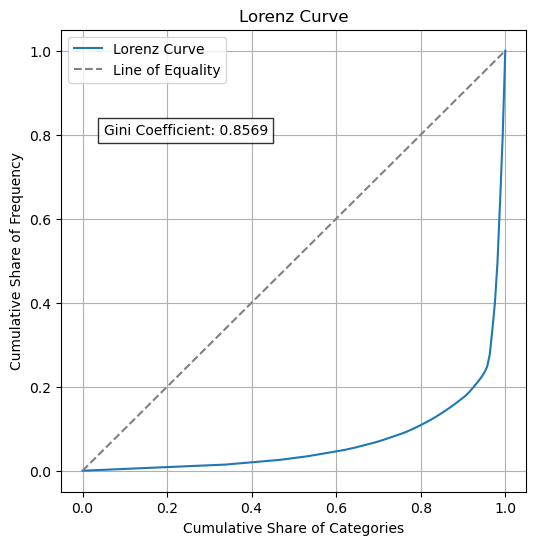

12

In [663]:
street_name_analysis = analyze_categorical_distribution(df_train['street_name'], threshold=0.8, plot=True, normalize=True)
len(street_name_analysis['top_categories'])

In [664]:
# remove street_name since it is imbalanced
df_train = df_train.drop(['street_name'], axis=1)
df_test = df_test.drop(['street_name'], axis=1)

### latitude column

In [665]:
univariate_analysis(df_train, 'latitude')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,40.714133,0.087478,40.726715,40.499546,40.912729,40.640309,40.771526,-0.544663,-0.080944,float64,0


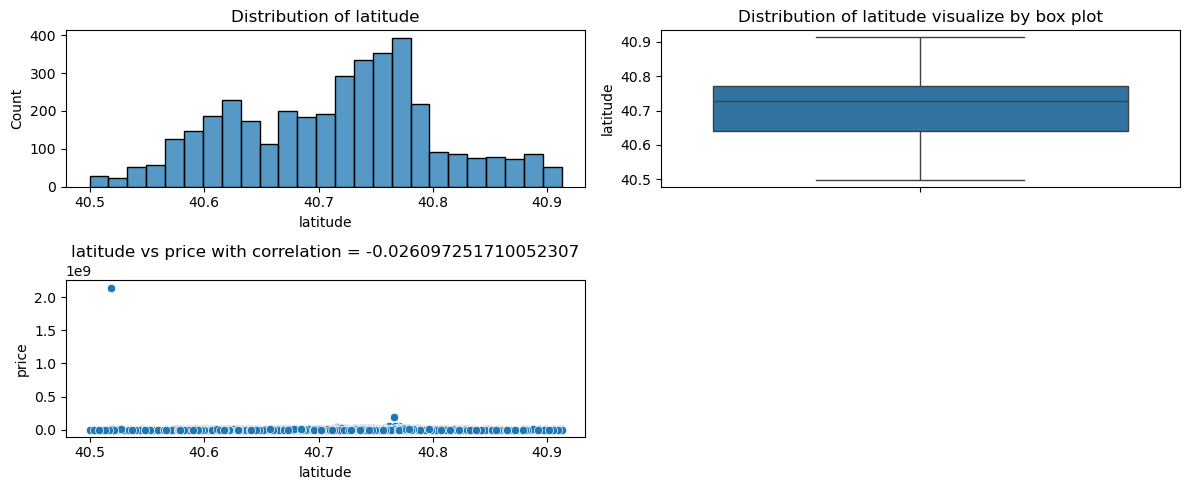

In [666]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,5))

sns.histplot(df_train['latitude'], ax=ax[0][0])
ax[0][0].set_title("Distribution of latitude")

sns.boxplot(df_train['latitude'], ax=ax[0][1])
ax[0][1].set_title("Distribution of latitude visualize by box plot")

sns.scatterplot(data=df_train, x='latitude', y='price', ax=ax[1][0])
ax[1][0].set_title(f"latitude vs price with correlation = {np.corrcoef(df_train['latitude'], df_train['price'])[0][1]}")

ax[1][1].axis("off")

plt.tight_layout()
plt.show()

### longitude column

In [667]:
univariate_analysis(df_train, 'longitude')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,-73.941843,0.100615,-73.948909,-74.253033,-73.70245,-73.987143,-73.872992,0.495861,-0.405504,float64,0


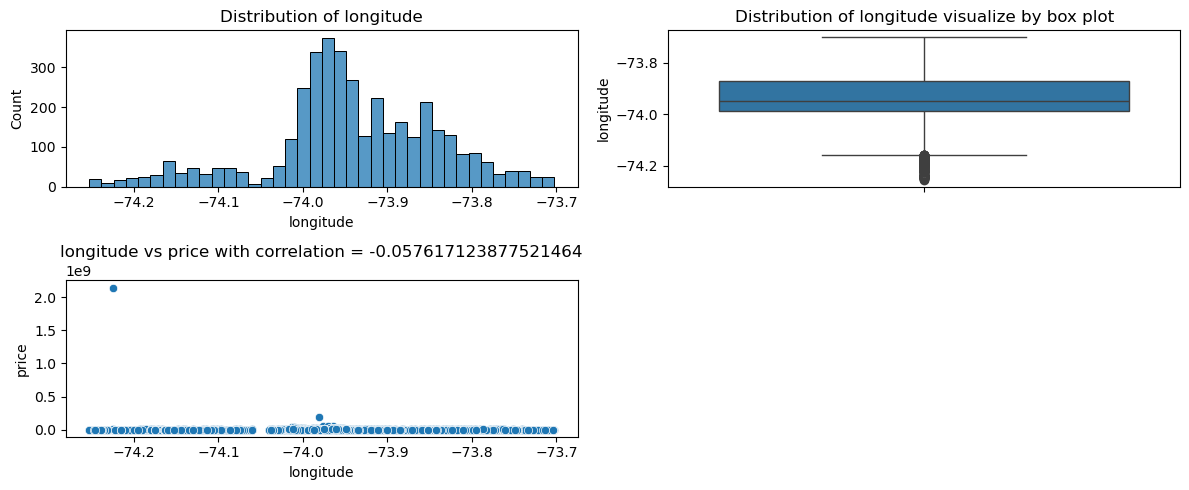

In [668]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,5))

sns.histplot(df_train['longitude'], ax=ax[0][0])
ax[0][0].set_title("Distribution of longitude")

sns.boxplot(df_train['longitude'], ax=ax[0][1])
ax[0][1].set_title("Distribution of longitude visualize by box plot")

sns.scatterplot(data=df_train, x='longitude', y='price', ax=ax[1][0])
ax[1][0].set_title(f"longitude vs price with correlation = {np.corrcoef(df_train['longitude'], df_train['price'])[0][1]}")

ax[1][1].axis("off")

plt.tight_layout()
plt.show()

### Create bed_bath_ratio

In [669]:
df_train['bed_bath_ratio'] = df_train.apply(lambda x: x['beds'] / x['bath'] if x['bath'] != 0 else 0, axis=1)
df_test['bed_bath_ratio'] = df_test.apply(lambda x: x['beds'] / x['bath'] if x['bath'] != 0 else 0, axis=1)

In [670]:
univariate_analysis(df_train, 'bed_bath_ratio')

,mean,std,median,min,max,25%,75%,kurtosis,skewness,type,nan
0,1.542599,0.715505,1.5,0.0,11.0,1.0,2.0,9.201908,1.732605,float64,0


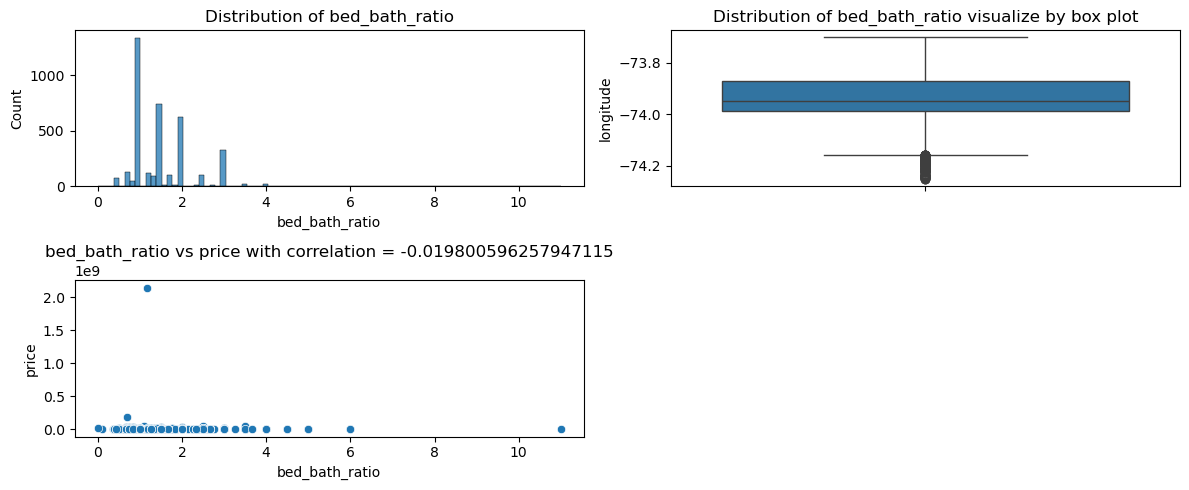

In [671]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,5))

sns.histplot(df_train['bed_bath_ratio'], ax=ax[0][0])
ax[0][0].set_title("Distribution of bed_bath_ratio")

sns.boxplot(df_train['longitude'], ax=ax[0][1])
ax[0][1].set_title("Distribution of bed_bath_ratio visualize by box plot")

sns.scatterplot(data=df_train, x='bed_bath_ratio', y='price', ax=ax[1][0])
ax[1][0].set_title(f"bed_bath_ratio vs price with correlation = {np.corrcoef(df_train['bed_bath_ratio'], df_train['price'])[0][1]}")

ax[1][1].axis("off")

plt.tight_layout()
plt.show()

## 4.2 Bivariate Analysis

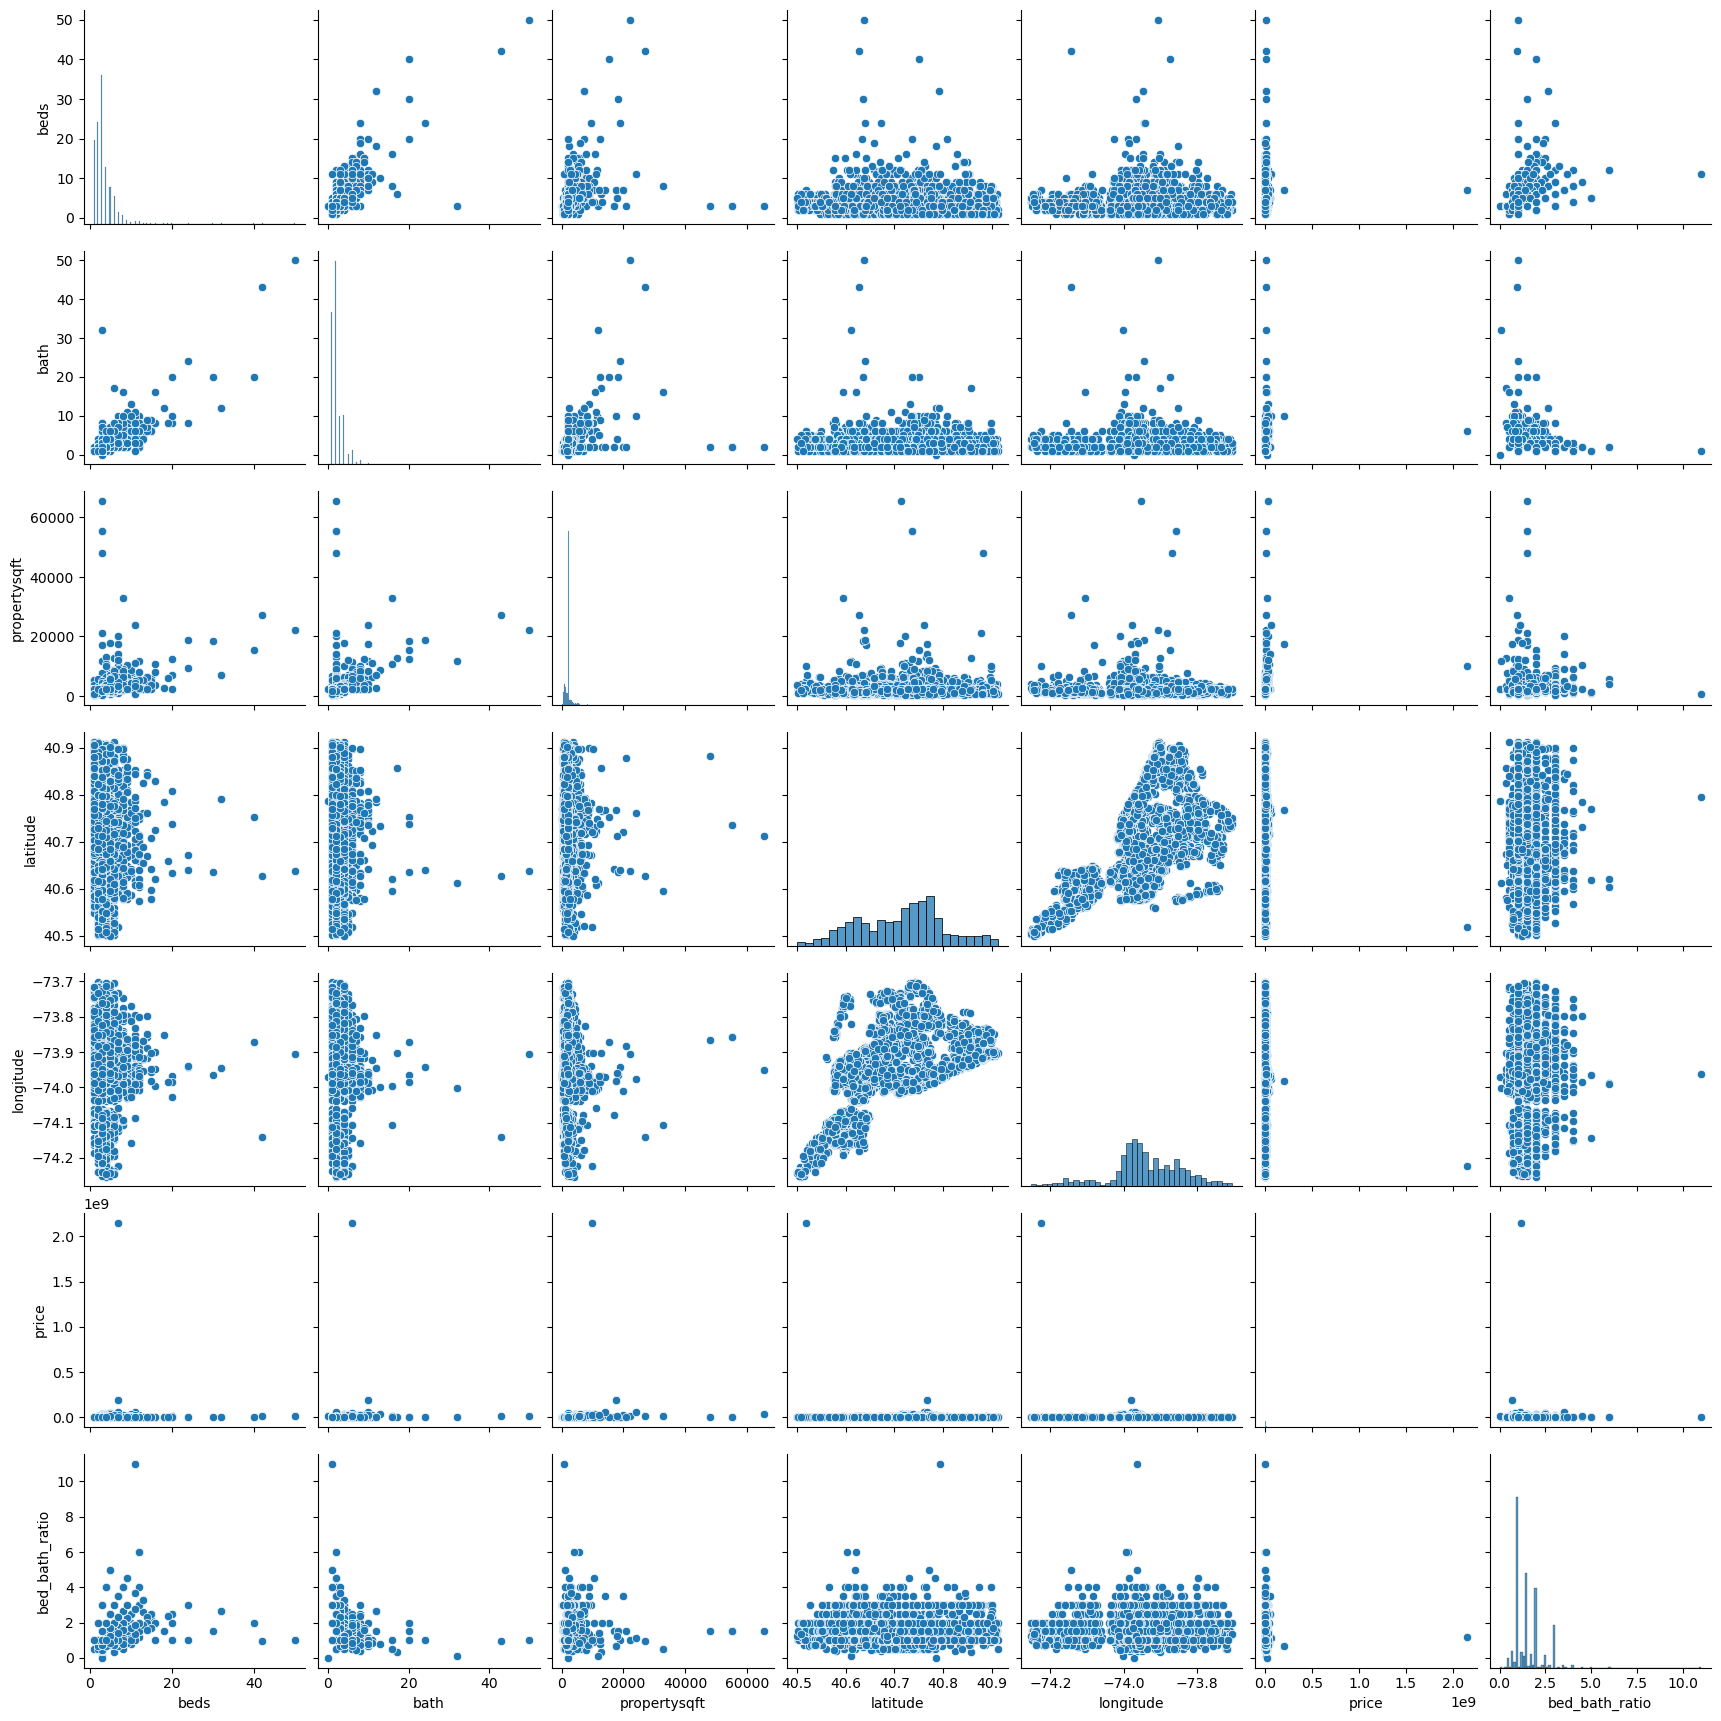

In [672]:
sns.pairplot(df_train)
plt.show()

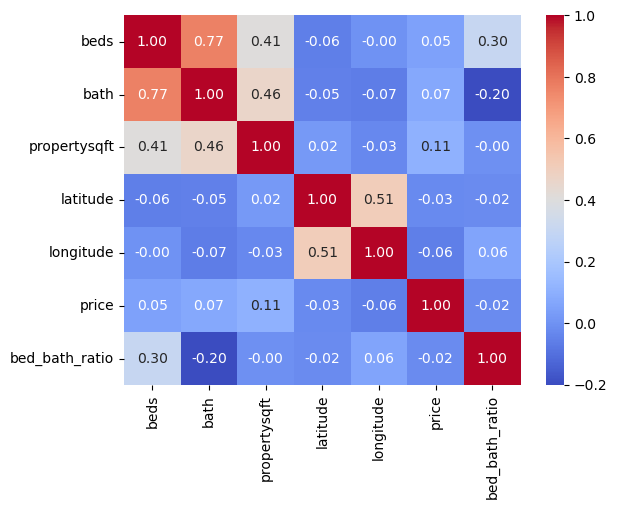

In [673]:
obj_df_train = df_train.select_dtypes(include = ['object'])

numeric_df_train = df_train.drop(obj_df_train, axis=1)

correlation = numeric_df_train.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [674]:
df_train.columns

Index(['brokertitle', 'type', 'beds', 'bath', 'propertysqft',
       'administrative_area_level_2', 'latitude', 'longitude', 'price',
       'status', 'borough', 'bed_bath_ratio'],
      dtype='object')

In [675]:
df_test.to_csv('..\\Datasets\\Feature_Engineer_Test_Set.csv', index=False)
df_train.to_csv('..\\Datasets\\Feature_Engineer_Train_Set.csv', index=False)

In [676]:
def log_transform_skewed(X, y=None, skew_thresh=1.0, log_target=True):
    X_log = X.copy()
    numeric_feats = X_log.select_dtypes(include=[np.number])
    skewed_feats = numeric_feats.apply(skew).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > skew_thresh]

    transformed_columns = []

    for feat in high_skew.index:
        if (X_log[feat] >= 0).all():
            X_log[feat] = np.log1p(X_log[feat])
            transformed_columns.append(feat)
        else:
            print(f"Skip '{feat}' because the value is negative or NAN")

    if y is not None:
        if log_target:
            if (y >= 0).all():
                y_log = np.log1p(y)
                return X_log, y_log, transformed_columns
            else:
                print("target has negative value")
                return X_log, y, transformed_columns
        else:
            return X_log, y, transformed_columns
    else:
        return X_log, transformed_columns


In [677]:
X_train_transformed, y_train_transformed, column_transformed = log_transform_skewed(df_train.drop('price', axis=1), df_train['price'], skew_thresh=1, log_target=True)

In [678]:
X_train_transformed.head()

,brokertitle,type,beds,bath,propertysqft,administrative_area_level_2,latitude,longitude,status,borough,bed_bath_ratio
0,other,Co-op for sale,0.693147,0.693147,7.689466,United States,40.755562,-73.731668,Pending,Queens,0.693147
1,Brokered by Brown Harris Stevens,Co-op for sale,0.693147,0.693147,7.689466,New York,40.904882,-73.905111,Pending,Bronx,0.693147
2,other,Co-op for sale,1.098612,1.098612,7.689466,New York,40.784301,-73.776196,Pending,Queens,0.693147
3,Brokered by EXP Realty,Co-op for sale,1.386294,0.693147,7.316548,United States,40.705861,-73.856597,Pending,Queens,1.386294
4,other,House for sale,1.791759,1.386294,7.877776,United States,40.729123,-73.904268,Pending,Queens,0.980829


In [679]:
df_train_transformed = pd.concat([X_train_transformed, y_train_transformed], axis=1)

In [680]:
X_test_transformed, y_test_transformed, test_columns_transformed = log_transform_skewed(df_test.drop('price', axis=1), df_test['price'], skew_thresh=1, log_target=True)

In [681]:
df_test_transformed = pd.concat([X_test_transformed, y_test_transformed], axis=1)

In [682]:
df_train_transformed.to_csv('..\\Datasets\\Transformed_Training_Set.csv', index=False)
df_test_transformed.to_csv('..\\Datasets\\Transformed_Test_Set.csv', index=False)

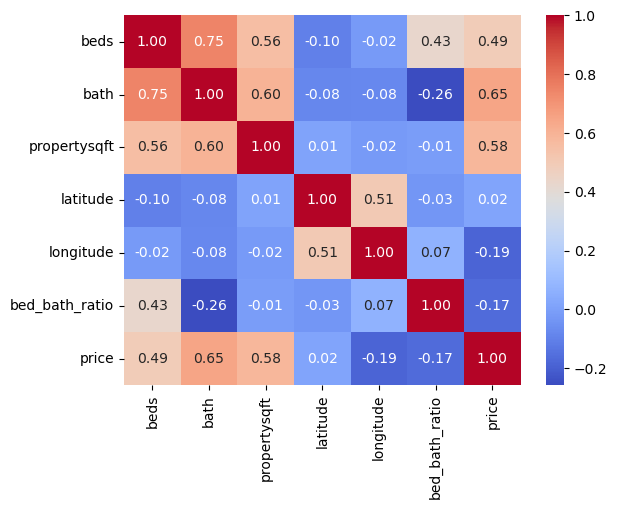

In [683]:
obj_df_train = df_train_transformed.select_dtypes(include = ['object'])

numeric_df_train = df_train_transformed.drop(obj_df_train, axis=1)

correlation = numeric_df_train.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# 5. Encoding and Scaling 

In [684]:
df_train_transformed.select_dtypes(include=['object']).columns

Index(['brokertitle', 'type', 'administrative_area_level_2', 'status',
       'borough'],
      dtype='object')

In [685]:
df_test_transformed.columns

Index(['brokertitle', 'type', 'beds', 'bath', 'propertysqft',
       'administrative_area_level_2', 'latitude', 'longitude', 'status',
       'borough', 'bed_bath_ratio', 'price'],
      dtype='object')

In [686]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_data_train = encoder.fit_transform(df_train_transformed[['brokertitle', 'type', 'administrative_area_level_2', 'status','borough']])

encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(['brokertitle', 'type', 'administrative_area_level_2', 'status','borough']))

encoded_data_test = encoder.transform(df_test_transformed[['brokertitle', 'type', 'administrative_area_level_2', 'status','borough']])

encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(['brokertitle', 'type', 'administrative_area_level_2', 'status','borough']))


In [688]:
encoded_df_train.shape

(3839, 64)

In [690]:
for df in [df_train_transformed, encoded_df_train, df_test_transformed, encoded_df_test]:
    df.reset_index(drop=True, inplace=True)

min_train_len = min(len(encoded_df_train), len(df_train_transformed))
min_test_len = min(len(encoded_df_test), len(df_test_transformed))

encoded_df_train = encoded_df_train.iloc[:min_train_len].copy()
df_train_aligned = df_train_transformed.iloc[:min_train_len].copy()

encoded_df_test = encoded_df_test.iloc[:min_test_len].copy()
df_test_aligned = df_test_transformed.iloc[:min_test_len].copy()

assert df_train_aligned[['beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'price','bed_bath_ratio']].isna().sum().sum() == 0
assert df_test_aligned[['beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'price', 'bed_bath_ratio']].isna().sum().sum() == 0

encoded_df_train = pd.concat([
    encoded_df_train.reset_index(drop=True),
    df_train_aligned[['beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'price','bed_bath_ratio']].reset_index(drop=True)
], axis=1)

encoded_df_test = pd.concat([
    encoded_df_test.reset_index(drop=True),
    df_test_aligned[['beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'price','bed_bath_ratio']].reset_index(drop=True)
], axis=1)


In [694]:
X_train = encoded_df_train.drop('price', axis=1)
y_train = encoded_df_train['price']

X_test = encoded_df_test.drop('price', axis=1)
y_test = encoded_df_test['price']

In [695]:
scaler = RobustScaler()

scaled_train_array = scaler.fit_transform(X_train)
encoded_df_train = pd.DataFrame(scaled_train_array, columns=X_train.columns)

scaled_test_array = scaler.transform(X_test)
encoded_df_test = pd.DataFrame(scaled_test_array, columns=X_test.columns)


encoded_df_train = pd.concat([encoded_df_train, y_train.reset_index(drop=True)], axis=1)
encoded_df_test = pd.concat([encoded_df_test, y_test.reset_index(drop=True)], axis=1)

In [696]:
encoded_df_train.to_csv('..\\Datasets\\Final_Training_Set.csv', index=False)
encoded_df_test.to_csv('..\\Datasets\\Final_Test_Set.csv', index=False)

# 6. Save scaler and encoder

In [697]:
joblib.dump(scaler, '..\\Model\\scaler.pkl')

['..\\Model\\scaler.pkl']

In [698]:
joblib.dump(encoder, '..\\Model\\onehot_encoder.pkl')

['..\\Model\\onehot_encoder.pkl']